<html lang="en">

    

<style>
        body{
            background-color: rgb(238, 238, 238) !important;
        }
        h2 {
            font-family:Arial, Helvetica, sans-serif;
            font-weight: bold;
            text-indent: 20%;
        }
        h3 {
            font-family:Arial, Helvetica, sans-serif;
            font-size: 140%;
            font-weight: bold;
            color: purple;
        }
</style>

    



<br><br><br><br><br><br><br><br>



    
<img src="quandl.png" alt="Quandl" width="240" height="120" style="float:right">


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
    
***    
# An Introduction to Quandl
***


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>



<font size=7 color="purple">Quandl started as a small Canadian start up.</font> 
  
<br>
<font size=6> 
<h2>
<a href="https://www.computerworld.com/article/2474710/quandl--wikipedia-for-data-.html">The Wikipedia of Data ? (2013)</a>  
</h2>
</font> 
    

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>




<font size=7 color="purple">
Quandl was acquired by Nasdaq Financial Services in October 2020.</font>
  
<font size=6> 
<h2>
<a href="https://quandl.com/">Quandl is now Nasdaq !</a>
</h2>
</font>
    
  
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br>



<font size=5> 
<h2>
<a href="https://github.com/quandl/quandl-python/">Git Hub Repository</a>  
</h2>
<br><br>

<h2>
<a href="https://docs.data.nasdaq.com/docs/data-organization">API documentation</a>
</h2>

<br><br>
<h2>
<a href="https://data.nasdaq.com/search">Search Engine</a>  
</h2>
</font>
    
<br><br>


***
# Python Demo
***

<br><br><br><br><br><br><br>

In [24]:
import quandl

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

<br><br><br><br><br><br><br>

***
# Databases in Quandl
***

<br><br><br><br><br><br><br>



In [25]:
quandl.ApiConfig.api_key ="M3nc_3stqz9rmUs1bqgq"

db_all = quandl.Database.all()

d_list = db_all.to_list()

# print(type(db_all))           # quandl.model.paginated_list.PaginatedList

print("The number of databases is ", len(d_list))

The number of databases is  91


<br><br><br><br><br><br><br>

<font size=5 color="purple">Print the meta detail record of the Merrill Lynch dataset.</font>

In [26]:
for d in d_list:
    if (d[2]=="ML"):
        i = d_list.index(d)
    
print(d_list[i])
    

[643, 'Corporate Bond Yield Rates', 'ML', 'Merrill Lynch, a major U.S. bank, publishes data on yield rates for corporate bonds in different regions.', 27, 229632, False, 'https://quandl-production-data-upload.s3.amazonaws.com/uploads/source/profile_image/643/thumb_ml.jpg', False, 'corporate-bond-yield-rates', False]


<br><br><br><br><br><br><br>

<font size =5 color="purple">Print the schema of the database list.</font>

In [27]:
cby_db = quandl.Database('ML')
cby_db.data_fields()            

['id',
 'name',
 'database_code',
 'description',
 'datasets_count',
 'downloads',
 'premium',
 'image',
 'favorite',
 'url_name',
 'exclusive']

<br><br><br><br><br><br><br>

<font size =5 color="purple">Print just a few details for the Merril Lynch Corporate Bond dataset.</font>

In [28]:
for d in d_list:
    if (d[2]=="ML"):
        i = d_list.index(d)

cby_list=d_list[i]    

name = cby_list[1]
code = cby_list[2]
descr=cby_list[3]         # this can be quite long !
dataset_count=cby_list[4]  
premium=cby_list[6]
url_name=cby_list[9]
str = "{0}, {1}, {2}, {3}, {4}  \n".format(name,code, dataset_count, premium, url_name)
print(str)


Corporate Bond Yield Rates, ML, 27, False, corporate-bond-yield-rates  



<br><br><br><br><br><br><br>

<font size=5 color="purple">Print all the data bases.</font>




In [29]:

mlcy_df = pd.DataFrame(columns = ['Name', 'Code', 'Datasets', 'Premium'])


for d in d_list:
    name = d[1]
    code = d[2]
    dataset_count=d[4] 
    premium=d[6]
    mlcy_df = mlcy_df.append({'Name' : name, 'Code' : code, 'Datasets' :dataset_count, 'Premium' : premium}, ignore_index=True)
    

mlcy_df.style.hide_index()

Name,Code,Datasets,Premium
Global Dairy Trade,GDT,702,False
Warsaw Stock Exchange,WARSAWSE,35,False
Paris School of Economics,PSE,5273,False
BTER,BTER,253,False
Barchart Global Index Prices,BCIW,83,True
Barchart Euronext.LIFFE Commodities Futures,BCLFE,6048,True
Barchart Minneapolis Grain Exchange Futures,BCMGEX,1319,True
Barchart Montreal Exchange Futures,BCMX,1074,True
Barchart End of Day DOW Index Prices,BCIO,314,True
Barchart End of Day S&P Index Prices,BCIP,1730,True


 <br><br><br><br><br><br><br>

<font size=5 color="purple">Print the schema for the dataset list.</font>



In [30]:

cby_ds_list = cby_db.datasets()
cby_ds=cby_ds_list[1]
cby_ds.data_fields()

pd.DataFrame(cby_ds.data_fields()).style.hide_index()



0
id
dataset_code
database_code
name
description
refreshed_at
newest_available_date
oldest_available_date
column_names
frequency



<font size=5 color="purple">Display all the data sets.</font>


In [31]:

# row = " {code:<16s}   {descr:<60s}  {columns:<60s}   ".format

mlcy_df = pd.DataFrame(columns = ['Code', 'Descr', 'Columns'])

for d in cby_ds_list:
    columns=" , ".join(d.column_names)
    # columns=str(d.column_names).strip('[]')
    # print(row(code=d.code, descr=d.name, columns=columns))
    mlcy_df = mlcy_df.append({'Code' : d.code, 'Descr' : d.name, 'Columns' : d.column_names}, ignore_index=True)
    
    

mlcy_df.style.hide_index()

Code,Descr,Columns
ML/EMHYY,Emerging Markets High Yield Corporate Bond Index Yield,"['DATE', 'BAMLEMHBHYCRPIEY']"
ML/AAAEY,US AAA rated Bond Index (yield),"['DATE', 'BAMLC0A1CAAAEY']"
ML/AATRI,US AA Rated Total Return Index,"['DATE', 'BAMLCC0A2AATRIV']"
ML/BEY,US B rated Corporate Bond Index (yield),"['DATE', 'BAMLH0A2HYBEY']"
ML/AEY,US Corporate Bond A rated Index (yield),"['DATE', 'BAMLC0A3CAEY']"
ML/BBBEY,US BBB Bond Index (yield),"['DATE', 'BAMLC0A4CBBBEY']"
ML/CCCTRI,US CCC Bond Total Return Index,"['DATE', 'BAMLHYH0A3CMTRIV']"
ML/BBTRI,US BB Bond Total Return Index,"['DATE', 'BAMLHYH0A1BBTRIV']"
ML/USEY,US Corporate Bond Index Yield,"['DATE', 'BAMLC0A0CMEY']"
ML/EMCTRI,Emerging Markets Corporate Bond Total Return Index,"['DATE', 'BAMLEMCBPITRIV']"



<br><br><br><br><br><br><br>

    
<font size=5 color="purple">
We will be looking at the Corporate Bond Yield Time Series.


<h2><a href="https://data.nasdaq.com/data/ML-corporate-bond-yield-rates" style="padding-bottom:20px;  font-size: 20px; text-decoration: underline;">Merril Lynch Corporate Bond Yields</a>
</h2>
</font> 
 
  
    
    
<font size=5 color="purple">
We will compare the history of AA, BB and CCC ratings.</font>


<h2><a href="https://data.nasdaq.com/data/ML/CCCY-us-cccrated-bond-index-yield" style="padding-bottom:20px;  font-size: 20px; text-decoration: underline;">Merril Lynch Corporate Bond Yields</a>
</h2>


<font size=5 color="purple">Now we will grab the data for corporate bond yields for 3 different classes. </font>





In [32]:


cby_cccy_ds_data = quandl.Dataset('ML/CCCY').data()
cby_aay_ds_data = quandl.Dataset('ML/AAY').data()
cby_bby_ds_data = quandl.Dataset('ML/BBY').data()

len(cby_cccy_ds_data)
len(cby_aay_ds_data)
len(cby_bby_ds_data)

6487



<font size=5 color="purple">Show the CCC and AA yields from the beginning. </font>


In [33]:
# ----------------------------------------------------------------------
ccc_df = pd.DataFrame(columns = ['Date', 'Yield'])

for d in cby_cccy_ds_data:
    ccc_df = ccc_df.append({'Date' : d[0], 'Yield' : d[1]},ignore_index = True)

ccc_df.head()
ccc_head = ccc_df.head()
print(ccc_head.to_string(index=False))

# ----------------------------------------------------------------------

aa_df = pd.DataFrame(columns = ['Date', 'Yield'])

for d in cby_aay_ds_data:
    aa_df = aa_df.append({'Date' : d[0], 'Yield' : d[1]},ignore_index = True)

aa_head = aa_df.head()
print(aa_head.to_string(index=False))


# ----------------------------------------------------------------------
bb_df = pd.DataFrame(columns = ['Date', 'Yield'])

for d in cby_bby_ds_data:
    bb_df = bb_df.append({'Date' : d[0], 'Yield' : d[1]},ignore_index = True)

       Date  Yield
 1996-12-31  13.97
 1997-01-02  13.95
 1997-01-03  14.02
 1997-01-06  14.03
 1997-01-07  14.05
       Date  Yield
 1996-12-31   6.82
 1997-01-02   6.92
 1997-01-03   6.90
 1997-01-06   6.92
 1997-01-07   6.95


<font color="purple">Plot all 3. </font>

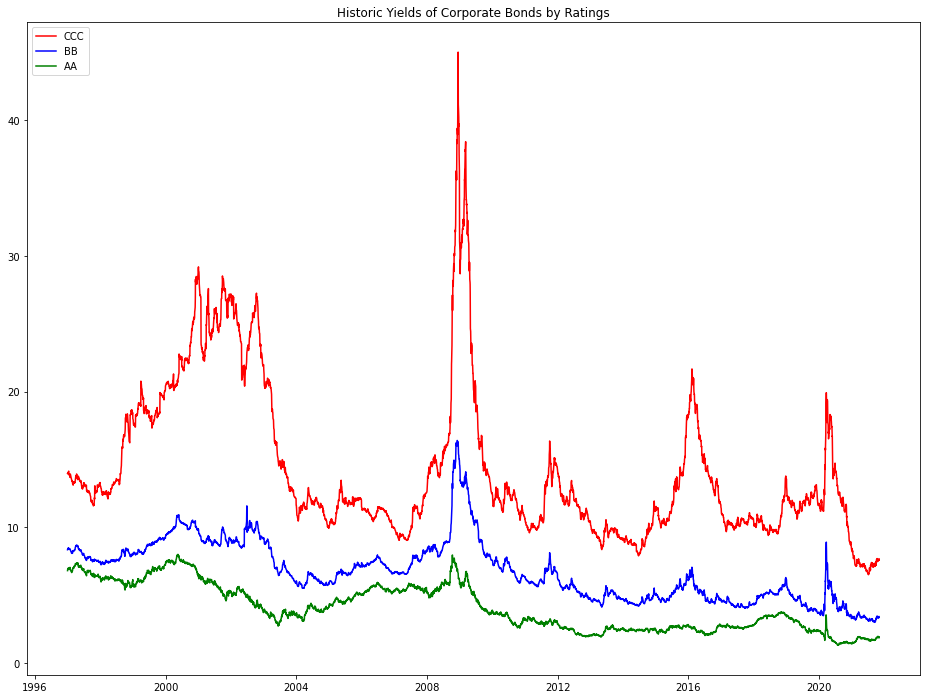

In [34]:

# A picture contains a thousand words

print("\n\n\n\n\n\n\n\n\n\n\n\n\n")

fig = plt.figure()
fig.set_size_inches(16, 12)
ax = plt.subplot(111)
ax.plot(ccc_df.Date, ccc_df.Yield, '-', color='red')
ax.plot(bb_df.Date, bb_df.Yield, '-', color='blue')
ax.plot(aa_df.Date, aa_df.Yield, '-', color='green')
ax.legend(["CCC", "BB", "AA"], loc ="upper left")
ax.set_title('Historic Yields of Corporate Bonds by Ratings')
plt.show()

<!-- Fun Fact  : Jupyter is named from the 3 core languages it supports : Julia, Python and R  -->






<font size=5 color="purple">
Additional Links</font>

<br>&ensp;&ensp;&ensp;&ensp; <a href="https://algotrading101.com/learn/quandl-guide/" style="padding-bottom:20px;  font-size: 20px; text-decoration: underline;">**Algo Trading Blog**</a>




# FED (Extra)

<br><br><br><br>

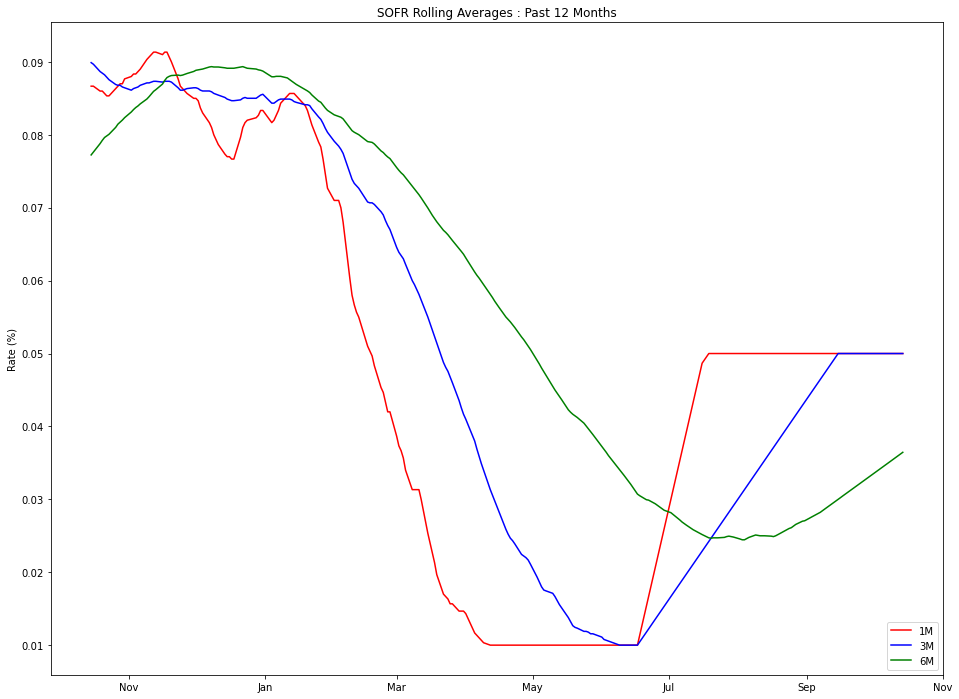

In [35]:



# URLError: urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired 


# didnt work
# pip install --upgrade certifi  


# works
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
    
  
    


data_file='https://markets.newyorkfed.org/read?startDt=2020-10-15&endDt=2021-10-14&eventCodes=525&productCode=50&sort=postDt:-1,eventCode:1&format=csv'

# see here for terms of use
#  https://www.newyorkfed.org/privacy/termsofuse

# data_file="http://markets.newyorkfed.org/read?startDt=2020-10-16&endDt=2021-10-15&eventCodes=520&productCode=50&sort=postDt:-1,eventCode:1&format=csv"

data_frame=pd.read_csv(data_file)

data_frame.columns

df = data_frame.rename(columns={'Effective Date': 'Date', '30-Day Average SOFR': 'AVG_1M','90-Day Average SOFR': 'AVG_3M', '180-Day Average SOFR': 'AVG_6M', 'SOFR Index': 'SOFRIndex'})

df= df[['Date','AVG_1M','AVG_3M','AVG_6M','SOFRIndex']]

# data is sorted from the most recent,  need to reverse the order
df=df[::-1].reset_index(drop=True)

# convert the date to datetime
# the date is a string which matplotlib wont intepret correctly
df.Date=pd.to_datetime(df['Date'], format = '%m/%d/%Y')


# textstr='Note the SOFR rates have been static at .05 for a while'


print("\n\n\n\n\n\n\n\n\n\n\n\n")

fig = plt.figure()
fig.set_size_inches(16, 12)
ax = plt.subplot(111)
ax.plot(df.Date, df.AVG_1M, '-', color='red')
ax.plot(df.Date, df.AVG_3M, '-', color='blue')
ax.plot(df.Date, df.AVG_6M, '-', color='green')
ax.legend(["1M", "3M", "6M"], loc ="lower right")
ax.set_title('SOFR Rolling Averages : Past 12 Months')
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
plt.gca().set(ylabel="Rate (%)")
# plt.gcf().text(0.25, 0.0, textstr, fontsize=10)
plt.show()
